In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv("iris.csv")
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [8]:
df["class_value"] = df["class"].map({
    "Iris-setosa" : 0, "Iris-versicolor": 1, "Iris-virginica": 2
})
df

,sepallength,sepalwidth,petallength,petalwidth,class,class_value
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [9]:
# new flower sample
sample = np.array([5.6, 3.2, 5.2, 1.45])
sample

array([5.6 , 3.2 , 5.2 , 1.45])

<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

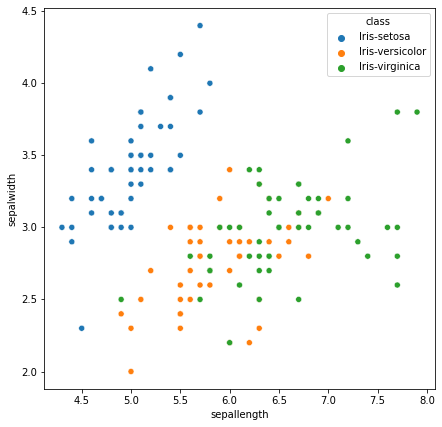

In [11]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="sepallength", y="sepalwidth", hue="class")


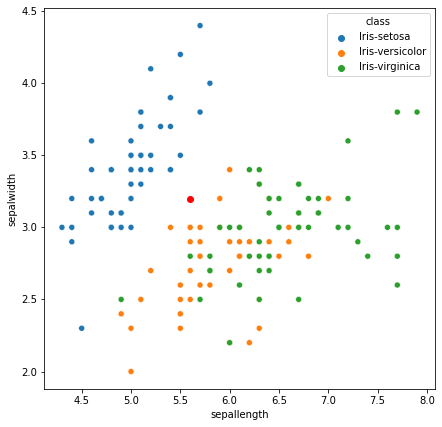

In [12]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="sepallength", y="sepalwidth", hue="class")
plt.scatter(5.6, 3.2, c='r')

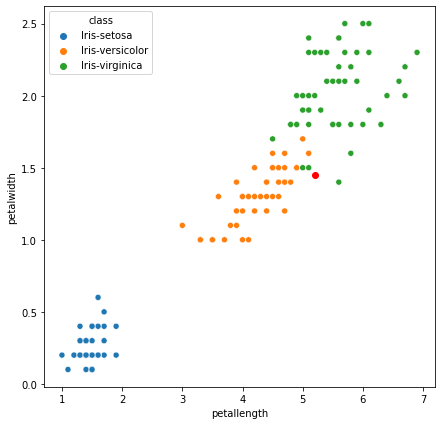

In [15]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="petallength", y="petalwidth", hue="class")
plt.scatter(5.2, 1.45, c='r')

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [31]:
X = df.iloc[: , :4]
y = df.class_value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

In [49]:
y_pred = model.predict(X_test)
pd.DataFrame( confusion_matrix(y_test, y_pred))

,0,1,2
0,11,0,0
1,0,12,1
2,0,0,6


In [50]:
sample

array([5.6 , 3.2 , 5.2 , 1.45])

In [51]:
model.predict([sample])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [52]:
model.predict_proba([sample])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.66666667, 0.33333333]])

In [53]:
result = []
for k in range(1,101):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    result.append(model.score(X_test, y_test))

In [54]:
result

[1.0,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.9,
 0.8666666666666667,
 0.9,
 0.8666666666666667,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8,
 0.8,
 0.8,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.7,
 0.6666666666666666,
 0.6666666666666666,
 0.6333333333333333,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6333333333333333,
 0.6333333

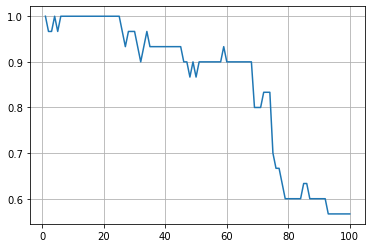

In [56]:
plt.plot( range(1,101), result)
plt.grid()

In [58]:
# store the model

joblib.dump(model, "iris.model")

['iris.model']

In [59]:
model_new = joblib.load("iris.model")
model_new

KNeighborsClassifier(n_neighbors=100)

In [60]:
model_new.predict([sample])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])